In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
#from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from math import sqrt

In [10]:
train_data = pd.read_csv('train.tsv', sep = '\t')
test_data = pd.read_csv('test.tsv', sep = '\t')

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
PhraseId      66292 non-null int64
SentenceId    66292 non-null int64
Phrase        66292 non-null object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [13]:
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [14]:
train_data['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

### Adding new column to the dataset

In [22]:
sentiment_words = []
for row in train_data['Sentiment']:
    if row == 0:
        sentiment_words.append('negative')
    elif row == 1:
        sentiment_words.append('somewhat negative')
    elif row == 2:
        sentiment_words.append('neutral')
    elif row == 3:
        sentiment_words.append('somewhat positive')
    elif row == 4:
        sentiment_words.append('positive')
    else :
        sentiment_words.append('failed')
train_data['Sentiment_words'] = sentiment_words

In [29]:

word_count = pd.value_counts(train_data['Sentiment_words'].values, sort= False)
#train_data['Sentiment_words'].value_counts()
word_count

somewhat negative    27273
negative              7072
positive              9206
somewhat positive    32927
neutral              79582
dtype: int64

### Plots of the Sentiments

<Container object of 5 artists>

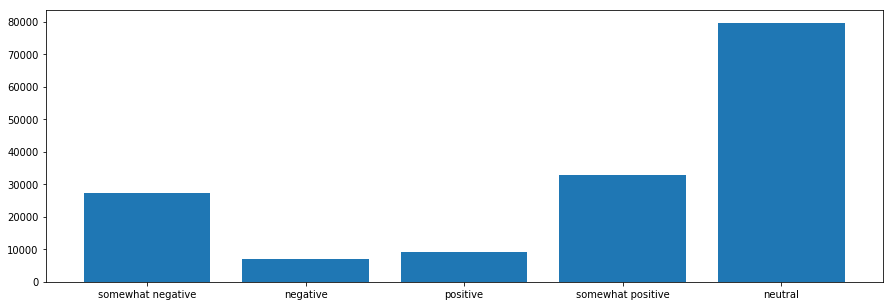

In [33]:
Index = [1,2,3,4,5]
plt.figure(figsize=(15,5))
plt.bar(Index,word_count, color='blue')
plt.xticks(Index, ['somewhat negative', 'negative', 'positive', 'somewhat positive','neutral'])
plt.bar(Index, word_count)

## Function to clean the column Phrase in the dataset

In [40]:
def review_to_words(raw_review):
    review = raw_review
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return(' '.join(review))

In [42]:
corpus = []
for i in range(0, len(train_data)):
    corpus.append(review_to_words(train_data['Phrase'][i]))

In [43]:
corpus1 = []
for i in range(0, len(test_data)):
    corpus1.append(review_to_words(test_data['Phrase'][i]))

### Create a new column and add the converted phrase

In [44]:
train_dataata['new_phrase'] = corpus

In [45]:
train_data.drop(['Phrase'], axis = 1, inplace = True)

In [46]:
train_data.head()

,PhraseId,SentenceId,Sentiment,Sentiment_words,new_phrase
0,1,1,1,somewhat negative,series escapade demonstrating adage good goose...
1,2,1,2,neutral,series escapade demonstrating adage good goose
2,3,1,2,neutral,series
3,4,1,2,neutral,
4,5,1,2,neutral,series


### For Positive Sentiment

In [47]:
positive = train_data[train_data['Sentiment_words'] == ('positive')]

In [48]:
words = ' '.join(positive['new_phrase'])
split_word = " ".join([word for word in words.split()])

In [57]:
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black', width=3000, height = 2500).generate(split_word)

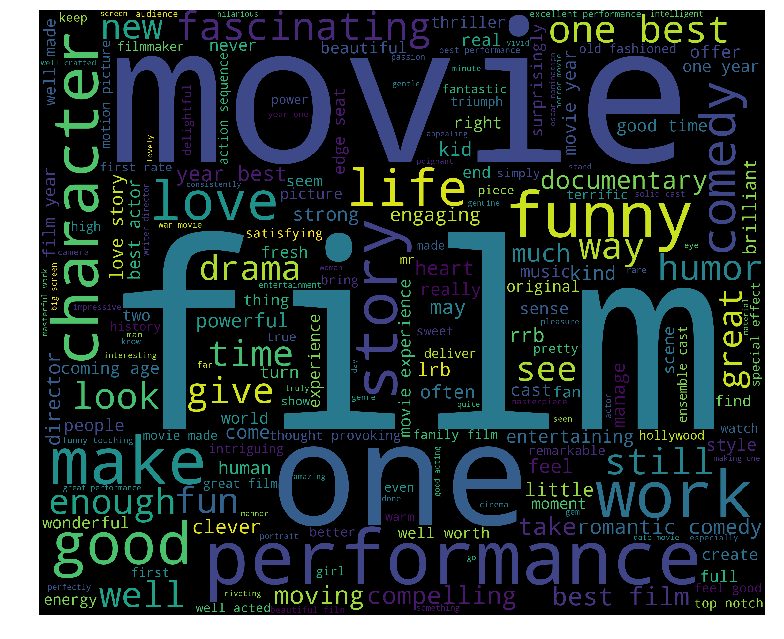

In [58]:
plt.figure(1, figsize=(13,13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Steps to count words in positive sentiment

In [59]:
pos = positive['new_phrase']

In [60]:
vectorizer = CountVectorizer(analyzer='word', tokenizer=None, preprocessor=None, stop_words=None, max_features= 2000)

In [61]:
pos_words = vectorizer.fit_transform(pos)
pos_words = pos_words.toarray()
pos = vectorizer.get_feature_names()

In [62]:
pos

['ability',
 'able',
 'absolute',
 'absolutely',
 'absorbing',
 'accept',
 'accessible',
 'acclaim',
 'accomplish',
 'accomplished',
 'accomplishes',
 'accomplishment',
 'accurate',
 'achievement',
 'achieves',
 'achingly',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'actor',
 'actress',
 'actually',
 'acute',
 'adam',
 'adaptation',
 'add',
 'addition',
 'admirable',
 'admire',
 'adorably',
 'adorns',
 'adrenalin',
 'adrenaline',
 'adult',
 'adventure',
 'adventurous',
 'aerial',
 'affecting',
 'affection',
 'affirming',
 'affirms',
 'age',
 'agenda',
 'aggrandizing',
 'ago',
 'ahead',
 'aimed',
 'air',
 'alike',
 'alive',
 'allegory',
 'allen',
 'allows',
 'alluring',
 'almost',
 'alone',
 'along',
 'also',
 'alternately',
 'always',
 'amazing',
 'amazingly',
 'ambiguity',
 'ambitious',
 'america',
 'american',
 'among',
 'amount',
 'amused',
 'amusing',
 'anchor',
 'anderson',
 'angst',
 'animal',
 'animated',
 'animation',
 'anime',
 'another',
 'answer',
 'antic',
 'anybod

In [63]:
print(pos_words.shape)

(9206, 2000)


In [64]:
dist= np.sum(pos_words, axis = 0)
for tag, count in zip(pos, dist):
    print(tag, count)

ability 20
able 32
absolute 9
absolutely 24
absorbing 18
accept 10
accessible 16
acclaim 9
accomplish 5
accomplished 23
accomplishes 7
accomplishment 17
accurate 9
achievement 30
achieves 5
achingly 7
across 12
act 29
acted 43
acting 101
action 93
actor 130
actress 14
actually 45
acute 8
adam 7
adaptation 22
add 17
addition 13
admirable 16
admire 7
adorably 7
adorns 7
adrenalin 6
adrenaline 6
adult 35
adventure 54
adventurous 17
aerial 7
affecting 9
affection 11
affirming 10
affirms 5
age 84
agenda 7
aggrandizing 7
ago 9
ahead 10
aimed 5
air 10
alike 5
alive 20
allegory 7
allen 15
allows 19
alluring 7
almost 50
alone 8
along 29
also 88
alternately 6
always 43
amazing 35
amazingly 11
ambiguity 6
ambitious 18
america 18
american 63
among 19
amount 16
amused 9
amusing 57
anchor 6
anderson 6
angst 10
animal 10
animated 28
animation 24
anime 6
another 43
answer 11
antic 7
anybody 5
anyone 35
anything 31
apart 8
apex 5
aplomb 11
apocalypse 8
apparent 6
appeal 15
appealing 27
appear 8
appreci

wrought 7
wry 12
ya 8
yarn 17
year 275
yes 5
yesterday 8
yet 48
yiddish 6
york 15
young 55
zing 11
zinger 5
zippy 10


In [69]:
positive_new = pd.DataFrame(dist)
positive_new.columns = ['word_count']
positive_new['word'] = pd.Series(pos, index = positive_new.index)
positive_new1=positive_new[['word','word_count']]

In [67]:
positive_new.head()

,word_count,word
0,20,ability
1,32,able
2,9,absolute
3,24,absolutely
4,18,absorbing


### Top 30 Words

In [70]:
top_30 = positive_new1.sort_values(['word_count'], ascending=[0])

In [71]:
top_30.head(30)

,word,word_count
652,film,1104
1149,movie,757
1223,one,517
1280,performance,472
161,best,394
715,funny,347
760,good,339
1933,well,317
1672,story,280
1990,year,275


In [73]:
cv = CountVectorizer(max_features= 1500)
x_train = cv.fit_transform(corpus).toarray()
x_test = cv.fit_transform(corpus1).toarray()
y = train_data.iloc[:, 2].values

## Using Prediction Model

In [74]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size = 0.40, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_real_pred = model.predict(x_test)

In [75]:
mse = ((y_pred - y_test) ** 2).mean()
mse

0.64737921312315772

In [76]:
rmse = sqrt(mse)
rmse

0.8045987901576522